# Scatterplot con valores faltantes

En la clase anterior vimos la función para poder realizar un scatterplot, para graficar 2 variables.

Esta función se apoya de valores `Dummy` que consiste en posicionarlos adecuadamente evitando que interfieran con los puntos reales. En esta clase vamos a aprender como crear la gráfica.

### Importando librerías

In [17]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

### Configurar el aspecto general de las gráficas del proyecto

In [18]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

### Función dummy para gráficar

In [19]:
def column_fill_with_dummies(
        column:pd.Series, # o puede ser string
        proportion_below: float = 0.10,
        jitter: float = 0.75,
        seed: int=42
) -> pd.Series:
    #¿Que hará nuestra función
    #copia para evitar modificar datos reales
    column = column.copy(deep=True)
    # Extraer valores
    missing_mask = column.isna()
    # Conteo de valores faltantes
    number_missing_values = missing_mask.sum()
    # Rango de nuestras variables
    column_range = column.max() - column.min()

    #Hacer shift a nuestros datos
    #Shift data
    column_shifted = column.min() - column.min()*proportion_below

    #Crear ruido para diferenciar el solapamiento
    #Add jitter around the points 
    np.random.seed(seed)

    #Columna con ruido
    column_jitter = (np.random.rand(number_missing_values)-2)*column_range*jitter

    #Guardar conjunto de datos 
    #Dummy data
    column[missing_mask] = column_shifted + column_jitter

    return column    

Ya estamos listos, ahora necesitamos nuestro conjunto de datos.

### Leer conjunto de datos

In [20]:
#Cargar conjunto de datos
riskfactors = pyreadr.read_r('dataset/riskfactors.rda')

#Convertirlo a Data Frame
riskfactors_df = next(iter(riskfactors.values()))

#Borrar el diccionario
del riskfactors

In [21]:
#Verificar tipo 
#type(riskfactors_df)

#LLamar al data frame
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


### Extensión de Pandas

In [22]:
#Añadir nuestra extensión de Pandas
%run pandas-missing-extension-re2.py

<Figure size 1000x1000 with 0 Axes>

### Graficar
Vamos a excluir las variables de tipo `categóricas` 

In [23]:
(
    riskfactors_df
    .select_dtypes(
        exclude = 'category'
    )
)

,age,weight_lbs,height_inch,bmi,children,health_physical,health_mental,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,49,190,64,32.68,0,3,15,2,NaN,NaN,1095,261,104,156,521,12
1,48,170,68,25.90,0,4,30,3,NaN,NaN,52,209,52,0,52,0
2,55,163,64,28.04,0,0,0,NaN,NaN,NaN,36,156,52,24,24,24
3,42,230,74,29.59,1,0,0,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,135,62,24.74,0,0,0,NaN,NaN,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,79,144,63,25.56,0,5,1,0,NaN,NaN,-7,-7,-7,-7,-7,-7
241,45,170,74,21.87,2,0,0,NaN,30,3,52,52,52,24,52,24
242,62,175,71,24.46,0,0,0,NaN,10,2,365,156,104,52,730,365
243,62,138,64,23.74,0,2,5,0,1,1,730,0,24,156,104,0


Tenemos solo variables numéricas, toda va bien. Pero solo nos quedaremos con las variables que tengan valores faltantes, agregamos una función `any()` para incluir cualquier valor faltante.

Continuemos...

In [24]:
(
    riskfactors_df
    .select_dtypes(
        exclude = 'category'
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,190,64,32.68,2,NaN,NaN,1095,261,104,156,521,12
1,170,68,25.90,3,NaN,NaN,52,209,52,0,52,0
2,163,64,28.04,NaN,NaN,NaN,36,156,52,24,24,24
3,230,74,29.59,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,135,62,24.74,NaN,NaN,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,NaN,NaN,-7,-7,-7,-7,-7,-7
241,170,74,21.87,NaN,30,3,52,52,52,24,52,24
242,175,71,24.46,NaN,10,2,365,156,104,52,730,365
243,138,64,23.74,0,1,1,730,0,24,156,104,0


Ahora vamos a añadir nuestra matriz de sombras. 

En ocasiones será util tener como valor booleano para poder combinarlo. `(true_string = True, false_string=False)`.

In [25]:
(
    riskfactors_df
    .select_dtypes(
        exclude = 'category'
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    #usamos la extensión de pandas
    .missing.bind_shadow_matrix(true_string = True,false_string = False)
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,...,bmi_NA,health_poor_NA,drink_days_NA,drink_average_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,190,64,32.68,2,NaN,NaN,1095,261,104,156,...,False,False,True,True,False,False,False,False,False,False
1,170,68,25.90,3,NaN,NaN,52,209,52,0,...,False,False,True,True,False,False,False,False,False,False
2,163,64,28.04,NaN,NaN,NaN,36,156,52,24,...,False,True,True,True,False,False,False,False,False,False
3,230,74,29.59,NaN,15,NaN,NaN,NaN,NaN,NaN,...,False,True,False,True,True,True,True,True,True,True
4,135,62,24.74,NaN,NaN,NaN,-7,261,209,261,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,NaN,NaN,-7,-7,-7,-7,...,False,False,True,True,False,False,False,False,False,False
241,170,74,21.87,NaN,30,3,52,52,52,24,...,False,True,False,False,False,False,False,False,False,False
242,175,71,24.46,NaN,10,2,365,156,104,52,...,False,True,False,False,False,False,False,False,False,False
243,138,64,23.74,0,1,1,730,0,24,156,...,False,False,False,False,False,False,False,False,False,False


Visualizamos nuestro resultado y nos arroja lo que queremos:

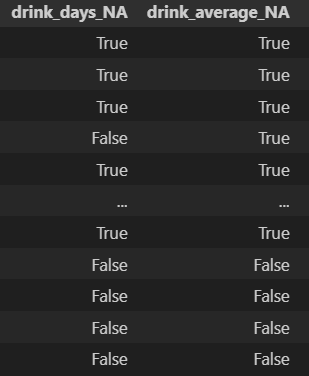

Es decir está lleno de `True` y `False`, en este caso será util trabajarlo de esta forma.

Lo único que necesitamos hacer es aplicar una función a nuestras columnas de tipo numéricas; esta función será una lambda.

Las columnas que tenga `NA` se le aplicara, pero las columnas que no lo tengan serán nuestros valores reales, las rellenamos con `dummies` con los siguientes parámetros:      
- column
- proportion_below=0.05
- jitter=0.075

In [26]:
(
    riskfactors_df
    .select_dtypes(
        exclude = 'category'
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    #usamos la extensión de pandas
    .missing.bind_shadow_matrix(true_string = True,false_string = False)
    .apply(
    lambda column: column if 'NA' in column.name else column_fill_with_dummies(column,proportion_below=0.05,jitter=0.075)
)
)


,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,...,bmi_NA,health_poor_NA,drink_days_NA,drink_average_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,190,64,32.68,2,-13.30447,-10.744371,1095,261,104,156,...,False,False,True,True,False,False,False,False,False,False
1,170,68,25.90,3,-11.619161,-9.966536,52,209,52,0,...,False,False,True,True,False,False,False,False,False,False
2,163,64,28.04,-13.30447,-12.258918,-10.261808,36,156,52,24,...,False,True,True,True,False,False,False,False,False,False
3,230,74,29.59,-11.619161,15,-10.441811,-321.125935,-98.641114,-143.138078,-54.14415,...,False,True,False,True,True,True,True,True,True,True
4,135,62,24.74,-12.258918,-12.648924,-11.039375,-7,261,209,261,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,-13.412476,-9.977072,-7,-7,-7,-7,...,False,False,True,True,False,False,False,False,False,False
241,170,74,21.87,-13.552477,30,3,52,52,52,24,...,False,True,False,False,False,False,False,False,False,False
242,175,71,24.46,-13.928428,10,2,365,156,104,52,...,False,True,False,False,False,False,False,False,False,False
243,138,64,23.74,0,1,1,730,0,24,156,...,False,False,False,False,False,False,False,False,False,False


En este momento ya no tenemos valores faltantes

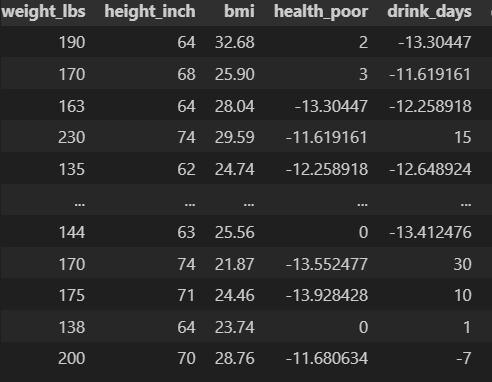

Como en el anterior

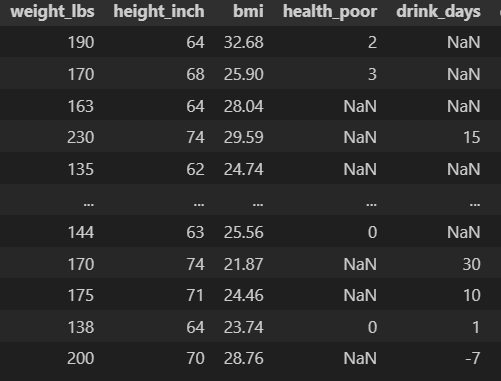

Esto está muy bien pues está pasando lo que necesitamos, pero ahora lo que necesitamos es encontrar una forma de graficar estos datos y especificar el color.

De tal manera que nos separe los puntos reales de los puntos que tenían valores faltantes pero ahora convertimos en valores para poder graficar.

Lo haremos creando una nueva columna de `nulidad` con una función `lambda` en la que usaremos 2 variables que queramos graficar. en este caso serán:
- `weight_lbs_NA`
- `height_inch_NA`

In [27]:
(
    riskfactors_df
    .select_dtypes(
        exclude = 'category'
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    #usamos la extensión de pandas
    .missing.bind_shadow_matrix(true_string = True,false_string = False)
    .apply(
    lambda column: column if 'NA' in column.name else column_fill_with_dummies(column,proportion_below=0.05,jitter=0.075)
    )
    .assign(
        nullity = lambda df:df.weight_lbs_NA|df.height_inch_NA
    )
)

,weight_lbs,height_inch,bmi,health_poor,drink_days,drink_average,diet_fruit,diet_salad,diet_potato,diet_carrot,...,health_poor_NA,drink_days_NA,drink_average_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA,nullity
0,190,64,32.68,2,-13.30447,-10.744371,1095,261,104,156,...,False,True,True,False,False,False,False,False,False,False
1,170,68,25.90,3,-11.619161,-9.966536,52,209,52,0,...,False,True,True,False,False,False,False,False,False,False
2,163,64,28.04,-13.30447,-12.258918,-10.261808,36,156,52,24,...,True,True,True,False,False,False,False,False,False,False
3,230,74,29.59,-11.619161,15,-10.441811,-321.125935,-98.641114,-143.138078,-54.14415,...,True,False,True,True,True,True,True,True,True,False
4,135,62,24.74,-12.258918,-12.648924,-11.039375,-7,261,209,261,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,144,63,25.56,0,-13.412476,-9.977072,-7,-7,-7,-7,...,False,True,True,False,False,False,False,False,False,False
241,170,74,21.87,-13.552477,30,3,52,52,52,24,...,True,False,False,False,False,False,False,False,False,False
242,175,71,24.46,-13.928428,10,2,365,156,104,52,...,True,False,False,False,False,False,False,False,False,False
243,138,64,23.74,0,1,1,730,0,24,156,...,False,False,False,False,False,False,False,False,False,False


Finalmente nos queda realizar este único paso, así que haremos un scatterplot.

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

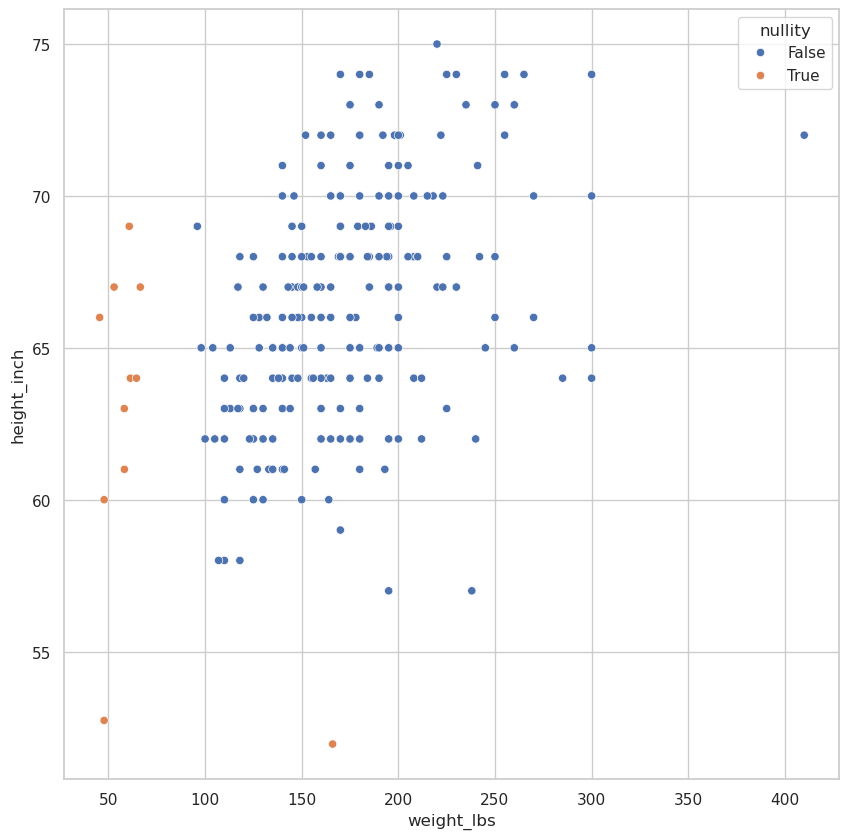

In [28]:
(
    riskfactors_df
    .select_dtypes(
        exclude = 'category'
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    #usamos la extensión de pandas
    .missing.bind_shadow_matrix(true_string = True,false_string = False)
    .apply(
    lambda column: column if 'NA' in column.name else column_fill_with_dummies(column,proportion_below=0.05,jitter=0.075)
    )
    .assign(
        nullity = lambda df:df.weight_lbs_NA|df.height_inch_NA
    )
    .pipe(
        lambda df:(
            sns.scatterplot(
                data = df,
                x='weight_lbs',
                y='height_inch',
                hue='nullity',
            )
        )
    )
)

Tenemos en el eje `x` weight y en el `y` height. En el centro tenemos los puntos azules que representan los datos completos (observaciones para ambas variables) y de color naranja tenemos observación para una variable solamente.

Como se puede ver en el eje vertical, tenemos puntos naranjas que representan datos en los cuales tenemos `altura` pero no tenemos `peso`. En el peso tenemos una única observación o 2 en la cual tenemos su `peso` pero no la `altura`.

Ya podemos ver donde se acumulan los puntos de los valores faltantes.

Regresando a la altura vemos como en el centro del eje vertical existe una agrupación de datos.

**El siguiente paso es determinar como colocar estos puntos dentro de los puntos reales (los que están en azul) determinando su valor en `weight` debido que tenemos el valor en `height`, para ver si preservan la relación entre las variables**.

Esta técnica ahorra mucho tiempo y sirve para cuando hablamos de valores faltantes, es decir para preservar la estructura de nuestros datos y sus relaciones.

En esta clase pudimos graficar una relación que nos permite incluir variables y observaciones con valores faltantes dentro de una gráfica que originalmente no me los mostraría. Teniendo así 2 grupos de puntos:
- puntos azules en los cuales las 2 variables tienen observaciones.
- puntos naranjas en los cuales solo se tiene observaciones para una variable pero no para la otra.

Esto es muy importante porque me ayuda a identificar donde se están acumulando mis puntos, su relación. Esto me ayudará en un futuro para determinar si añadir los valores faltantes dentro de los valores reales conserva su relación, entonces al ser tan importante este tipo de visualización la siguiente tarea es abstraer este tipo de visualización como función y añadirla a `missing-extension-pandas`, de tal manera que teniendo cualquier conjunto de datos podamos hacer uso de ella y graficar 2 variables.

### Código

In [34]:
# Añadimos esto al inicio del código
@pd.api.extensions.register_series_accessor("missing")

#Esto al final
    def column_fill_with_dummies(
        self,
        proportion_below: float = 0.10,
        jitter: float = 0.075,
        seed: int = 42
    ) -> pd.Series:
        """Fills a column with missing values with dummies, to be used in a scatterplot"""

        # We're going to create a new series for the dummy data

        # Extract values metadata
        missing_mask = self._obj.isna()
        number_missing_values = missing_mask.sum()
        column_range = self._obj.max() - self._obj.min()

        # Shift data
        column_shift = self._obj.min() - self._obj.min() * proportion_below

        # Create the "jitter" (noise) to be added around the points
        np.random.seed(seed)
        column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

        # Create new series for dummy data with the same index as the missing values in the original series
        dummy_data = pd.Series(column_shift + column_jitter, index=self._obj[missing_mask].index)

        # Return a series combining original and dummy data
        return self._obj.fillna(dummy_data)
    
    def missing_scatterplot(
        self,
        x:str, 
        y:str, 
        **kwargs
        ):
        """Recieves a DataFrame and 2 strings with the names of the columns to be used as x and y. Plots a nullity scatterplot"""

            
        return(
            self._obj.select_dtypes(
                    exclude='category'
                )
                .pipe(
                    lambda df : df[df.columns[df.isna().any()]]
                )
                .missing.bind_shadow_matrix(true_string=True, false_string=False)
                .apply(
                    lambda column: column if "_NA" in column.name else column.missing.column_fill_with_dummies(
                        proportion_below=0.05, 
                        jitter=0.075)
                )
                .assign(
                    nullity = lambda df:df[x+'_NA'] | df[y+'_NA']
                )
                .pipe(
                    lambda df:(
                        sns.scatterplot(
                            data=df, 
                            x=x,
                            y=y,
                            hue='nullity'
                        )
                    )
                )
        )

### Ponerlo a prueba

In [31]:
riskfactors_df.columns

Index(['state', 'sex', 'age', 'weight_lbs', 'height_inch', 'bmi', 'marital',
       'pregnant', 'children', 'education', 'employment', 'income', 'veteran',
       'hispanic', 'health_general', 'health_physical', 'health_mental',
       'health_poor', 'health_cover', 'provide_care', 'activity_limited',
       'drink_any', 'drink_days', 'drink_average', 'smoke_100', 'smoke_days',
       'smoke_stop', 'smoke_last', 'diet_fruit', 'diet_salad', 'diet_potato',
       'diet_carrot', 'diet_vegetable', 'diet_juice'],
      dtype='object')

/home/dens/Dens/Codes/dete_exp/codes/pandas-missing-extension-re2.py:252: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  


<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

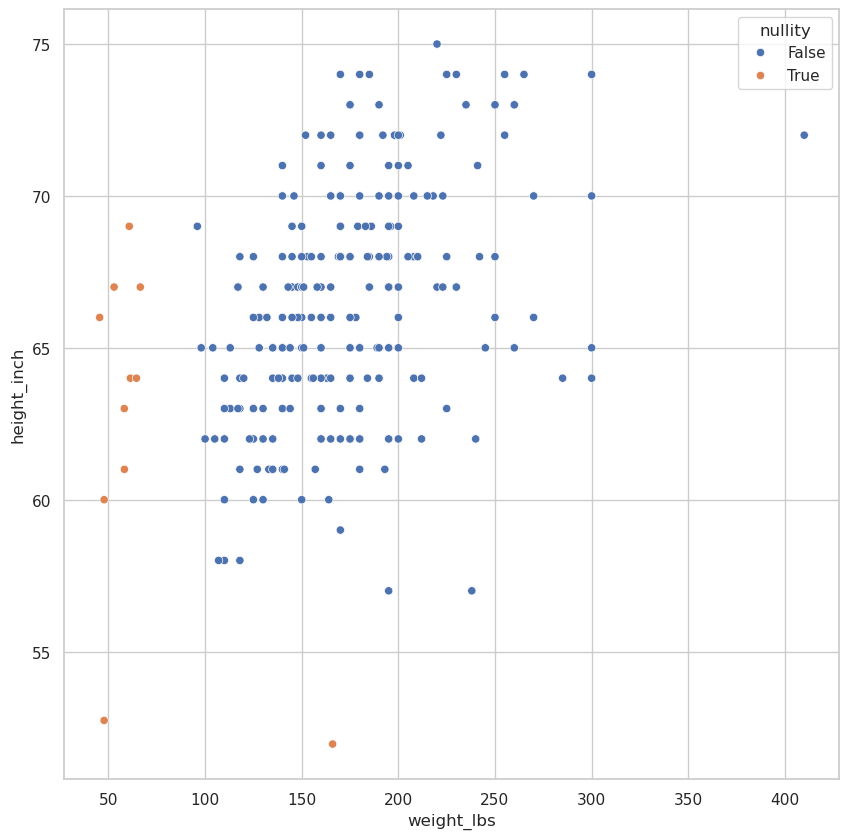

In [32]:
riskfactors_df.missing.missing_scatterplot(
    x="weight_lbs",
    y="height_inch",
)

/home/dens/Dens/Codes/dete_exp/codes/pandas-missing-extension-re2.py:252: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x:str,


<AxesSubplot:xlabel='bmi', ylabel='height_inch'>

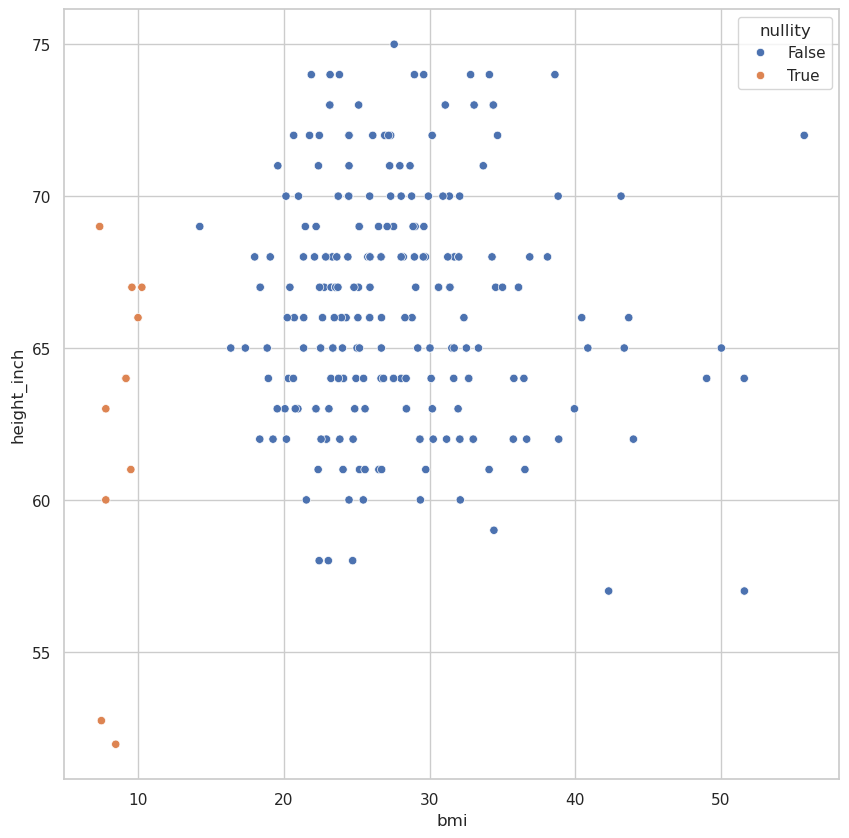

In [37]:
riskfactors_df.missing.missing_scatterplot(
    x="bmi",
    y="height_inch",
)